In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
import gensim
import pickle
import random
import itertools
import warnings
warnings.filterwarnings('ignore')

c:\users\ravi\appdata\local\programs\python\python37\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [181]:
data = pd.read_csv('IndianExprees.csv')
data.head()

c:\users\ravi\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Article_id,Title,Describtion,Date,Category,URL
0,0,Fire at Vaishno Devi shrine complex; cash coun...,"No one was injured in the fire, which broke ou...","June 8, 2021 7:28:32 pm",India,https://indianexpress.com/article/india/vaishn...
1,1,"Had not gone to meet Nawaz Sharif, says Uddhav...",Uddhav Thackeray led a delegation of his cabin...,"June 8, 2021 6:56:40 pm",India,https://indianexpress.com/article/india/had-no...
2,2,Corruption case: Former Haryana I-T deputy com...,It was in 2016 that the CBI had arrested Nitin...,"June 8, 2021 6:25:24 pm",India,https://indianexpress.com/article/india/corrup...
3,3,Kannur MP K Sudhakaran appointed chief of Cong...,Sudhakaran will replace Ramachandran who had a...,"June 8, 2021 5:04:40 pm",India,https://indianexpress.com/article/india/sudhak...
4,4,"Kerala girl of Class 5 writes to CJI, lauds SC...",Chief Justice N V Ramana responded to the Clas...,"June 8, 2021 4:43:10 pm",India,https://indianexpress.com/article/india/kerala...


In [189]:
data = data.rename(columns = {'Describtion': 'Description'}, inplace = False)
data.head()

c:\users\ravi\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Article_id,Title,Description,Date,Category,URL,title_description
0,0,Fire at Vaishno Devi shrine complex; cash coun...,"No one was injured in the fire, which broke ou...","June 8, 2021 7:28:32 pm",India,https://indianexpress.com/article/india/vaishn...,Fire at Vaishno Devi shrine complex; cash coun...
1,1,"Had not gone to meet Nawaz Sharif, says Uddhav...",Uddhav Thackeray led a delegation of his cabin...,"June 8, 2021 6:56:40 pm",India,https://indianexpress.com/article/india/had-no...,"Had not gone to meet Nawaz Sharif, says Uddhav..."
2,2,Corruption case: Former Haryana I-T deputy com...,It was in 2016 that the CBI had arrested Nitin...,"June 8, 2021 6:25:24 pm",India,https://indianexpress.com/article/india/corrup...,Corruption case: Former Haryana I-T deputy com...
3,3,Kannur MP K Sudhakaran appointed chief of Cong...,Sudhakaran will replace Ramachandran who had a...,"June 8, 2021 5:04:40 pm",India,https://indianexpress.com/article/india/sudhak...,Kannur MP K Sudhakaran appointed chief of Cong...
4,4,"Kerala girl of Class 5 writes to CJI, lauds SC...",Chief Justice N V Ramana responded to the Clas...,"June 8, 2021 4:43:10 pm",India,https://indianexpress.com/article/india/kerala...,"Kerala girl of Class 5 writes to CJI, lauds SC..."


In [190]:
data = data.drop(['Category','Article_id'],axis=1)

c:\users\ravi\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [191]:
data.head()

c:\users\ravi\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Title,Description,Date,URL,title_description
0,Fire at Vaishno Devi shrine complex; cash coun...,"No one was injured in the fire, which broke ou...","June 8, 2021 7:28:32 pm",https://indianexpress.com/article/india/vaishn...,Fire at Vaishno Devi shrine complex; cash coun...
1,"Had not gone to meet Nawaz Sharif, says Uddhav...",Uddhav Thackeray led a delegation of his cabin...,"June 8, 2021 6:56:40 pm",https://indianexpress.com/article/india/had-no...,"Had not gone to meet Nawaz Sharif, says Uddhav..."
2,Corruption case: Former Haryana I-T deputy com...,It was in 2016 that the CBI had arrested Nitin...,"June 8, 2021 6:25:24 pm",https://indianexpress.com/article/india/corrup...,Corruption case: Former Haryana I-T deputy com...
3,Kannur MP K Sudhakaran appointed chief of Cong...,Sudhakaran will replace Ramachandran who had a...,"June 8, 2021 5:04:40 pm",https://indianexpress.com/article/india/sudhak...,Kannur MP K Sudhakaran appointed chief of Cong...
4,"Kerala girl of Class 5 writes to CJI, lauds SC...",Chief Justice N V Ramana responded to the Clas...,"June 8, 2021 4:43:10 pm",https://indianexpress.com/article/india/kerala...,"Kerala girl of Class 5 writes to CJI, lauds SC..."


In [192]:
data.isnull().sum()

c:\users\ravi\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Title                0
Description          0
Date                 0
URL                  0
title_description    0
dtype: int64

In [193]:
data['title_description'] = data['Title'] + data['Description']
data.head()

c:\users\ravi\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Title,Description,Date,URL,title_description
0,Fire at Vaishno Devi shrine complex; cash coun...,"No one was injured in the fire, which broke ou...","June 8, 2021 7:28:32 pm",https://indianexpress.com/article/india/vaishn...,Fire at Vaishno Devi shrine complex; cash coun...
1,"Had not gone to meet Nawaz Sharif, says Uddhav...",Uddhav Thackeray led a delegation of his cabin...,"June 8, 2021 6:56:40 pm",https://indianexpress.com/article/india/had-no...,"Had not gone to meet Nawaz Sharif, says Uddhav..."
2,Corruption case: Former Haryana I-T deputy com...,It was in 2016 that the CBI had arrested Nitin...,"June 8, 2021 6:25:24 pm",https://indianexpress.com/article/india/corrup...,Corruption case: Former Haryana I-T deputy com...
3,Kannur MP K Sudhakaran appointed chief of Cong...,Sudhakaran will replace Ramachandran who had a...,"June 8, 2021 5:04:40 pm",https://indianexpress.com/article/india/sudhak...,Kannur MP K Sudhakaran appointed chief of Cong...
4,"Kerala girl of Class 5 writes to CJI, lauds SC...",Chief Justice N V Ramana responded to the Clas...,"June 8, 2021 4:43:10 pm",https://indianexpress.com/article/india/kerala...,"Kerala girl of Class 5 writes to CJI, lauds SC..."


In [194]:
data.shape

c:\users\ravi\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(2250, 5)

c:\users\ravi\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:title={'center':'Length of Title_Description'}, xlabel='News Length'>

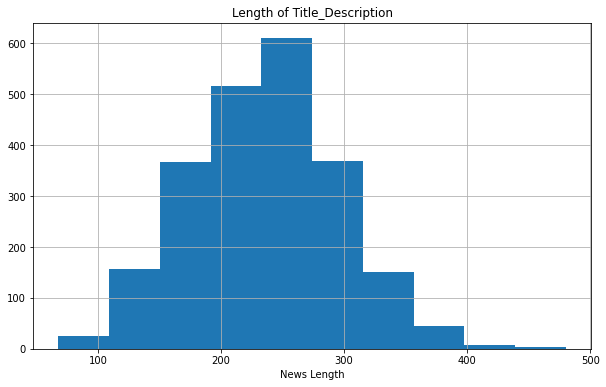

In [197]:
plt.figure(figsize = (10,6))
plt.title('Length of Title_Description')
plt.xlabel('News Length')
plt.savefig('news_length.png')
data['title_description'].str.len().hist()

#### The histogram shows that title_description range from 50 to 500 characters and generally it is between 150 to 350 characters.

In [9]:
# Code Snippet for Word Number Histogram

def plot_word_number_histogram(text):
    text.str.split().\
        map(lambda x: len(x)).\
        hist()

c:\users\ravi\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


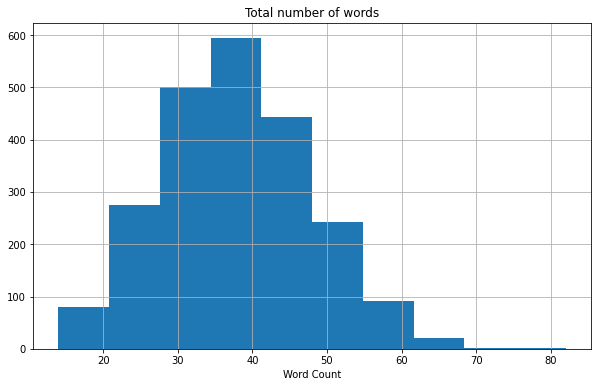

In [198]:
plt.figure(figsize = (10,6))
plt.title('Total number of words')
plt.xlabel('Word Count')
plt.savefig('Word_count.png')
plot_word_number_histogram(data['title_description'])

#### the above histogram shows that words in title_descriptioin ranges from 10 to 80 and mostly falls between 20 to 55 words.

In [11]:
def plot_word_length_histogram(text):
    text.str.split().\
        apply(lambda x : [len(i) for i in x]). \
        map(lambda x: np.mean(x)).\
        hist()

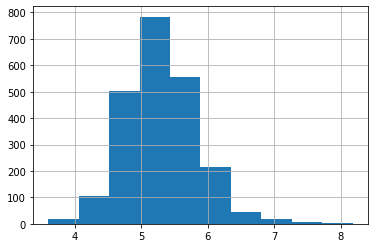

In [12]:
plot_word_length_histogram(data['title_description'])

#### The average word length ranges between 2 to 9 with 5 being the most common length. Does it mean that people are using really short words in news headlines?

### One reason why this may not be true is stopwords. Stopwords are the words that are most commonly used in any language such as “the”,” a”,” an” etc. As these words are probably small in length these words may have caused the above graph to be left-skewed.

In [13]:
import nltk
from nltk.corpus import stopwords

In [14]:
def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

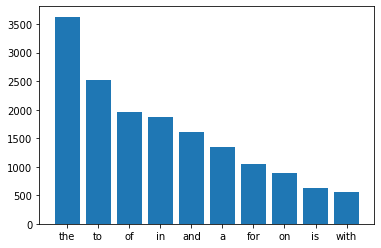

In [15]:
plot_top_stopwords_barchart(data['title_description'])

#### We can evidently see that stopwords such as "the", “to”,” of” and “in” dominate in news headlines.

In [16]:
# we know which stopwords occur frequently in our text,
# let’s inspect which words other than these stopwords occur frequently.
import seaborn as sns
from nltk.corpus import stopwords
from collections import  Counter

def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:40]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)

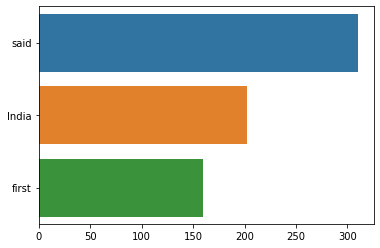

In [17]:
plot_top_non_stopwords_barchart(data['title_description'])

#### The “said”, “India” and “first” dominate the headlines over the last many years.

## Ngram exploration

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter

In [19]:
#bigrams 
def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

c:\users\ravi\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


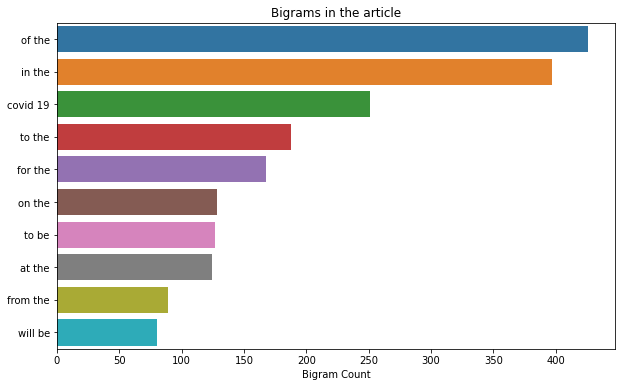

In [201]:
plt.figure(figsize = (10,6))
plt.title('Bigrams in the article')
plt.xlabel('Bigram Count')
plt.savefig('Bigram_count.png')
plot_top_ngrams_barchart(data['title_description'],2)

#### We can observe that the bigrams such as ‘of the ’, ’in the’ that are seems to be stopwords, increasing the news length
#### which are not useful and the bigram "covid 19" dominating the news.

c:\users\ravi\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


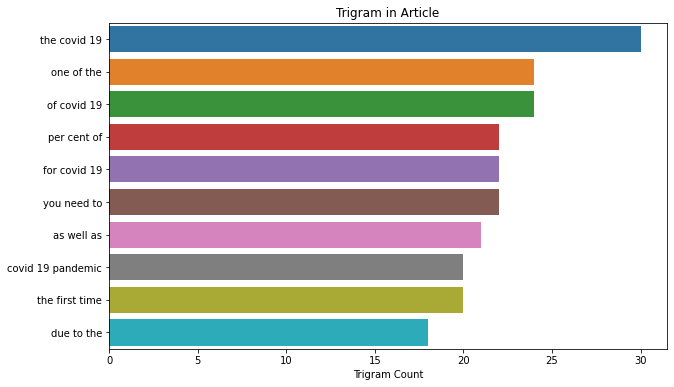

In [202]:
plt.figure(figsize = (10,6))
plt.title('Trigram in Article')
plt.xlabel('Trigram Count')
plt.savefig('Trigram_count.png')
plot_top_ngrams_barchart(data['title_description'],3)

#### We can observe that tirgram "the covid 19" is dominating the news which also include the bigram "covid 19" and the trigram
#### "one of the" also occur many times although this trigram doesn't include any informative word.

### It means that we should put some effort into data cleaning and see if we were able to combine those synonym terms into one clean token.

## Preprocessing and Topic Modeling Exploration 

In [22]:
import gensim
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
import pyLDAvis.gensim_models

In [23]:
import nltk
nltk.download('punkt')

c:\users\ravi\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [24]:
nltk.download('wordnet')

c:\users\ravi\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [25]:
def get_lda_objects(text):
    nltk.download('stopwords')    
    stop=set(stopwords.words('english'))

    
    def _preprocess_text(text):
        corpus=[]             #contains cleaned data
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            
            #tokenize the newz article and remove the stopwords
            words=[w for w in word_tokenize(news) if (w not in stop)]

            #lemmatize the article
            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    return corpus
    ## bag of words model using gensim
    #dic=gensim.corpora.Dictionary(corpus)
    #bow_corpus = [dic.doc2bow(doc) for doc in corpus]
    
    ## LDA model
    #lda_model =  gensim.models.LdaMulticore(bow_corpus, 
     #                              num_topics = 6, 
      #                             id2word = dic,                                    
       #                            passes = 10,
        #                           workers = 2)
    
    #return lda_model, bow_corpus, dic

c:\users\ravi\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
#lda_model, bow_corpus, dic = get_lda_objects(data['title_description'])
cleaned_data =  get_lda_objects(data['title_description'])

c:\users\ravi\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [27]:
cleaned_data

c:\users\ravi\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['Fire',
  'Vaishno',
  'Devi',
  'shrine',
  'complex',
  'cash',
  'counter',
  'damagedNo',
  'one',
  'injured',
  'fire',
  'broke',
  'structure',
  'adjoining',
  "'Bhawan",
  'sanctum',
  'sanctorum',
  'official',
  'said'],
 ['Had',
  'gone',
  'meet',
  'Nawaz',
  'Sharif',
  'say',
  'Uddhav',
  'Thackeray',
  'play',
  'one-on-one',
  'meeting',
  'ModiUddhav',
  'Thackeray',
  'led',
  'delegation',
  'cabinet',
  'colleague',
  'comprising',
  'deputy',
  'Ajit',
  'Pawar',
  'senior',
  'NCP',
  'leader',
  'Congress',
  'Ashok',
  'Chavan',
  'meet',
  'Narendra',
  'Modi',
  'discus',
  'issue',
  'pertaining',
  'state'],
 ['Corruption',
  'case',
  'Former',
  'Haryana',
  'I-T',
  'deputy',
  'commissioner',
  'get',
  'year',
  'prisonIt',
  '2016',
  'CBI',
  'arrested',
  'Nitin',
  'Garg',
  'deployed',
  'Sirsa',
  'time',
  'accepting',
  'bribe',
  'two',
  'lakh',
  'private',
  'firm',
  'proprietor',
  'giving',
  'relief',
  'levying',
  'penalty'],
 ['

In [28]:
len(cleaned_data)  #length is equal to no of rows in our corpus

c:\users\ravi\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2250

### tfidf Function

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.cluster import KMeansClusterer, cosine_distance
from sklearn.metrics.pairwise import cosine_similarity

c:\users\ravi\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
#R
vectorizer=TfidfVectorizer()
def tfidf_scores(d):
    tfidf=vectorizer.fit_transform(d)
    return tfidf

c:\users\ravi\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
#R
n_data=[]
for i in cleaned_data:
    n_data.append(' '.join(i))
new_data=pd.Series(n_data)    
scores=tfidf_scores(n_data)

c:\users\ravi\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
scores.shape

c:\users\ravi\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(2250, 12668)

#### we can observe that Each article contains 12668 dimensional word vector.

### Topic Modelling

In [33]:
#word embedding approach-w2v
# facebook's pre trained fasttext model 
en_model = gensim.models.KeyedVectors.load_word2vec_format('wiki-news-300d-1M-subword.vec')

c:\users\ravi\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
t_vocab=list(vectorizer.vocabulary_.keys())
dim=300
en_ignored=[]
en_w2vectors=np.ones((1,dim))
for i in t_vocab:
    if i in en_model:     
        en_w2vectors=np.concatenate((en_w2vectors,en_model[i].reshape(1,-1)),axis=0)
    else:
        en_ignored.append(i)
        en_w2vectors=np.concatenate((en_w2vectors,np.zeros((1,dim))),axis=0)

c:\users\ravi\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
len(t_vocab)

c:\users\ravi\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


12668

In [36]:
en_w2vectors.shape

c:\users\ravi\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(12669, 300)

In [37]:
en_w2vectors

c:\users\ravi\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
       [ 9.99999978e-03,  1.14000002e-02,  1.49999997e-02, ...,
        -2.70000007e-03,  4.63000014e-02,  2.81000007e-02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-2.25000009e-02,  1.25000002e-02, -9.70000029e-03, ...,
         3.39000002e-02,  7.99999980e-04,  1.86999999e-02],
       [-1.18000004e-02,  5.95999993e-02, -6.69999979e-03, ...,
        -1.09999999e-03,  6.80000009e-03,  1.11999996e-02],
       [ 9.99999975e-05, -2.85999998e-02, -1.65999997e-02, ...,
         4.99999989e-03, -2.52999999e-02, -8.79999995e-03]])

In [38]:
w2v=en_w2vectors[1:,:]

c:\users\ravi\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
w2v.shape

c:\users\ravi\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(12668, 300)

In [40]:
print(w2v)

[[ 9.99999978e-03  1.14000002e-02  1.49999997e-02 ... -2.70000007e-03
   4.63000014e-02  2.81000007e-02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-4.56999987e-02 -9.10000037e-03  1.04999999e-02 ...  1.43999998e-02
   6.62999973e-02  3.20999995e-02]
 ...
 [-2.25000009e-02  1.25000002e-02 -9.70000029e-03 ...  3.39000002e-02
   7.99999980e-04  1.86999999e-02]
 [-1.18000004e-02  5.95999993e-02 -6.69999979e-03 ... -1.09999999e-03
   6.80000009e-03  1.11999996e-02]
 [ 9.99999975e-05 -2.85999998e-02 -1.65999997e-02 ...  4.99999989e-03
  -2.52999999e-02 -8.79999995e-03]]


c:\users\ravi\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [41]:
d2v=scores*w2v

c:\users\ravi\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [42]:
d2v.shape

c:\users\ravi\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(2250, 300)

In [43]:
d2v

c:\users\ravi\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[-0.03483268, -0.00120637, -0.00106911, ...,  0.01529564,
         0.03653452,  0.00520063],
       [-0.03773747, -0.00763856,  0.03558843, ...,  0.00187888,
         0.01229503,  0.01377574],
       [-0.01515955, -0.02116248, -0.00216384, ...,  0.02879387,
         0.02856852,  0.01783156],
       ...,
       [-0.03251953, -0.01923446,  0.01878699, ...,  0.03546225,
         0.01242186, -0.02332219],
       [-0.03599867,  0.00102361,  0.0199181 , ..., -0.01369492,
         0.02612906,  0.00327621],
       [-0.01061137, -0.03401782,  0.02849652, ...,  0.00725891,
        -0.00349189, -0.0097736 ]])

### Clustering Article

In [44]:
num_clt=10

kclusterer = KMeansClusterer(num_clt, distance=cosine_distance, repeats=25)
assigned_clusters = kclusterer.cluster(d2v, assign_clusters=True)

c:\users\ravi\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [45]:
clt_articles={}
for i in range(10):
    clt_articles[i]=np.where(np.array(assigned_clusters)==i) 

c:\users\ravi\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [46]:
clt_articles

c:\users\ravi\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{0: (array([  22,   47,   75,   79,   81,   93,  126,  144,  166,  194,  216,
          233,  243,  259,  272,  286,  305,  308,  325,  368,  375,  387,
          398,  402,  405,  413,  424,  429,  440,  463,  475,  488,  516,
          528,  535,  537,  587,  588,  591,  600,  613,  614,  633,  638,
          642,  655,  657,  688,  693,  707,  724,  732,  740,  759,  761,
          784,  786,  832,  833,  836,  840,  850,  869,  872,  880,  895,
          896,  904,  918,  922,  925,  929,  933,  939,  948,  950,  954,
          957,  979,  983,  986,  994,  997, 1000, 1001, 1002, 1018, 1019,
         1022, 1036, 1046, 1122, 1134, 1141, 1155, 1163, 1171, 1173, 1213,
         1220, 1225, 1228, 1229, 1254, 1258, 1263, 1286, 1298, 1306, 1308,
         1309, 1320, 1323, 1329, 1336, 1342, 1343, 1352, 1355, 1360, 1364,
         1382, 1386, 1387, 1397, 1400, 1409, 1416, 1430, 1433, 1443, 1450,
         1460, 1480, 1482, 1490, 1492, 1493, 1494, 1496, 1522, 1547, 1554,
         1558, 1573, 1

### Data Generation

In [47]:
# avg. reading speed (200 wpm,source: INTERNET)
speed=200

c:\users\ravi\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [48]:
l=[]
for i in data['title_description']:
    l.append(np.array(i.split()).shape[0])
#avg. length of doc (no. of words)
avg_length=np.average(l)
len(l)

c:\users\ravi\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2250

In [49]:
avg_length

c:\users\ravi\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


37.809777777777775

In [50]:
avg_time = avg_length/speed
avg_time*60 #in seconds 

c:\users\ravi\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


11.342933333333333

In [175]:
def generate_data(aid):
    #Generate clickstream data 
    click_stream=np.random.binomial(1,0.75,500)
    #print(click_stream.reshape(-1,1).shape)
    
    # Generate time sample from three gaussian distributions
    time = np.random.normal(5,0.5,60)      # just opened and closed
    #print(time.shape)
    time = np.append(time, np.random.normal(30,10,160))  # read half/some part   
    #print(time.shape)
    time = np.append(time, np.random.normal(80,10,270))   # read completely
    #print(time.shape)
    time = np.append(time, np.random.normal(200,10,10))  # app left apened etc.
    #print(time.reshape(-1,1).shape)
    
    
    #generate 10 values for time
    new_time=time.reshape(-1,1)*click_stream.reshape(-1,1)
    read_time=random.sample(list(new_time.ravel()),10)
    #print((read_time))
    click=np.ones((len(read_time),1))
    #print(click)
    for i in range(len(read_time)):
        if read_time[i]==0:
            click[i]=0
    #print(click)
    #generating 10 random articles from corpus
    if len(aid)==0:
        aid=[]
        for i in range(10):
            aid.append(random.sample(list(itertools.chain.from_iterable(clt_articles[i])),1)[0])  
    #print(aid)
    #sort aid based on time        
    read_time=np.array(read_time)
    #print(read_time)
    n_liked=len(set(read_time[read_time>50]).intersection(set(read_time[read_time<150]))) #n_liked = no of likes given by user for articles
    #print(n_liked)
    sorted_=[x for _,x in sorted(zip(read_time,aid),reverse=True)]
    #print(len(sorted_))
    liked_=[x for _,x in sorted(zip(read_time,aid),reverse=True)][:n_liked]
    #print(liked_)
    #calculating a_rnk and liked articles
    rnk={}
    for j in range(len(sorted_)):
        rnk[sorted_[j]]=j+1    
    #print(rnk)
    a_rnk=[]
    liked=np.zeros((10,1))
    for k in range(len(aid)):
        a_rnk.append(rnk[aid[k]])
        if aid[k] in liked_:
            liked[k]=1
    #print(a_rnk)
    
    return aid,read_time,click,a_rnk,liked


c:\users\ravi\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [176]:
#R
class user():
    id_generator = itertools.count(1)
    def __init__(self,name,article):
        self.name=name
        self.id =next(self.id_generator)
        #self.sid=session
        self.aid,self.time,self.click,self.a_rnk,self.liked=generate_data(article)

c:\users\ravi\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [177]:
#R
def user_data(session_id,articles):
    
    if len(articles)!=0:
        user1=user('u1',articles[0])
        user2=user('u2',articles[1])
        user3=user('u3',articles[2])
        user4=user('u4',articles[3])
        user5=user('u5',articles[4])
    else:
        user1=user('u1',[])
        user2=user('u2',[])
        user3=user('u3',[])
        user4=user('u4',[])
        user5=user('u5',[])

    #creating a dataframe for user profiling
    up=pd.DataFrame()
    uid=[]
    aid=[]
    time=[]
    click=[]
    a_rnk=[]
    liked=[]
    
    user_names=[user1,user2,user3,user4,user5]    
    
    for s in range(session_id):
        if s==0:
            for names in user_names:
                uid.append([names.id]*10)
                aid.append(names.aid)
                time.append(names.time)
                click.append(names.click)
                a_rnk.append(names.a_rnk)
                liked.append(names.liked)
                
        else:    
            for n,names in enumerate(user_names): 
                aid_,time_,click_,a_rnk_,liked_=generate_data([])
                uid.append([names.id]*10)
                aid.append(aid_)
                time.append(time_)
                click.append(click_)
                a_rnk.append(a_rnk_)
                liked.append(liked_)
            
    up['uid']=np.array(uid).ravel()
    up['sid']=np.sort(list(range(1,session_id+1))*50)
    up['aid']=np.array(aid).reshape(-1,1)
    up['time']=np.array(time).reshape(-1,1)
    up['click']=np.array(click).reshape(-1,1)
    up['a_rnk']=np.array(a_rnk).reshape(-1,1)
    up['liked']=np.array(liked).reshape(-1,1)

    return up

c:\users\ravi\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [178]:
#N
dummy_data=user_data(4,[])

[ 0.          0.         20.57432194  0.         75.66590584 75.77658482
  0.         85.08202972  0.          0.        ]
3
[458, 629, 1521]
{458: 1, 629: 2, 1521: 3, 681: 4, 2022: 5, 1789: 6, 1581: 7, 593: 8, 146: 9, 11: 10}
[7, 6, 4, 9, 3, 2, 10, 1, 5, 8]
[ 0.          5.14626744 97.06054649 29.43416444  4.74573695 84.49247375
 40.90406547  0.         82.80777054 86.19836096]
4
[618, 1237, 468, 1249]
{618: 1, 1237: 2, 468: 3, 1249: 4, 795: 5, 849: 6, 1808: 7, 1424: 8, 1560: 9, 784: 10}
[10, 7, 1, 6, 8, 3, 5, 9, 4, 2]
[ 5.36806564 98.57889869  0.         78.59678919 28.81822509 28.95921975
  0.          4.93989727 24.08983023  0.        ]
2
[1697, 552]
{1697: 1, 552: 2, 322: 3, 1989: 4, 1714: 5, 1492: 6, 955: 7, 1179: 8, 594: 9, 152: 10}
[6, 1, 8, 2, 4, 3, 10, 7, 5, 9]
[ 0.         76.89917055  0.         32.80940727  4.75677964  5.03149299
 90.63847074 85.04349162 19.11549293 69.07236301]
4
[795, 252, 2065, 593]
{795: 1, 252: 2, 2065: 3, 593: 4, 2082: 5, 455: 6, 437: 7, 45: 8, 463: 

c:\users\ravi\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [55]:
dummy_data

c:\users\ravi\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,uid,sid,aid,time,click,a_rnk,liked
0,1,1,1046,0.000000,0.0,10,0.0
1,1,1,409,15.000547,1.0,9,0.0
2,1,1,1699,39.205165,1.0,6,0.0
3,1,1,2190,77.490022,1.0,3,1.0
4,1,1,985,79.927346,1.0,2,1.0
...,...,...,...,...,...,...,...
195,5,4,518,0.000000,0.0,10,0.0
196,5,4,381,5.022558,1.0,6,0.0
197,5,4,662,101.761008,1.0,1,1.0
198,5,4,318,21.578927,1.0,5,0.0


In [57]:
user_data = dummy_data

c:\users\ravi\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [58]:
mean_time=user_data.groupby('aid').mean()['time']

c:\users\ravi\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [59]:
mean_time

c:\users\ravi\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


aid
40      103.748254
69        0.000000
83       92.365688
88        5.375878
91       70.009452
           ...    
2190     77.490022
2192      0.000000
2227      0.000000
2228     95.011711
2234     34.858013
Name: time, Length: 191, dtype: float64

# User data has 7 fields:
### 1.uid: user id.
### 2.sid: session id.
### 3.aid: id of article given to user. 
### 4.time: time spent by user on that article.
### 5.click: whether user read that article(yes or no).
### 6.a_rnk: rank of article amongst all the articles given to user(acc. to liking).
### 7.liked: whether user liked that article.


In [53]:
user_data.head()

c:\users\ravi\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,uid,sid,aid,time,click,a_rnk,liked
0,1,1,475,5.124089,1.0,9,0.0
1,1,1,815,77.729844,1.0,6,1.0
2,1,1,810,7.861226,1.0,8,0.0
3,1,1,1664,0.000000,0.0,10,0.0
4,1,1,187,72.890481,1.0,7,1.0


c:\users\ravi\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:title={'center':'Mean time taken by a user to read article'}, xlabel='uid'>

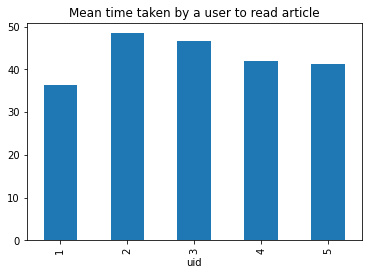

In [54]:
plt.title("Mean time taken by a user to read article")
user_data.groupby(['uid'])['time'].mean().plot(kind='bar')

c:\users\ravi\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:title={'center':'Liked vs Non liked articles'}>

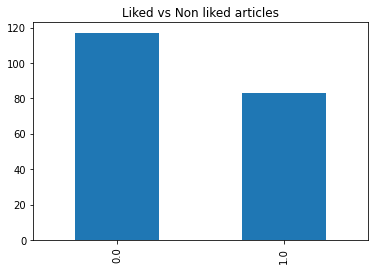

In [55]:
plt.title("Liked vs Non liked articles")
user_data.liked.value_counts().plot(kind='bar')

## Recommender Function

In [56]:
#R
# similarity function
def similar(d2v,liked,n):
    cos_sim=cosine_similarity(d2v,liked)
    return cos_sim.ravel().argsort()[-(n+1):-1][::-1]

c:\users\ravi\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [203]:
#R
def new(data,d2v):
    
    #average vector of every user /user profile
    profile=[]
    for j in range(5):
        temp=[]
        for i in data.loc[(data['uid'] ==j+1) & data['liked']==1]['aid'] :    
            weight=int((data[data['aid']==i]['time']/mean_time[i]).values[0])
            temp.append(d2v[i]*weight)  
        profile.append(np.mean(temp,axis=0)) 

    #based on all users (2)
    all_avg=np.mean(profile,axis=0)  #average vector from all users
    trending=similar(d2v,all_avg.reshape(1,-1),2)
    

    #based on user's history (6)
    #content based filtering
    history=[]
    for vector in profile:
        history.append(similar(d2v,vector.reshape(1,-1),6))
    

    #based on similar users (2)
    #collaborative filtering
    sim_users=np.ones((5,5))
    for i in range(len(profile)):
        for j in range(len(profile)):
            sim_users[i][j]=cosine_similarity(profile[i].reshape(1,-1),profile[j].reshape(1,-1))
    sim_users=sim_users.argsort()[:,-3:-1] 
    #print(sim_users)

    #articles based on similar users 
    sim_art=[]
    for i,j in sim_users:
        temp=[]
        temp.append(profile[i])
        temp.append(profile[j])
        sim_art.append(similar(d2v,np.mean(np.array(temp),axis=0).reshape(1,-1),2))
    #return history,sim_art,trending
    new_aid=[]
    for i in range(5):
        temp=[]
        temp.extend(history[i])
        temp.extend(sim_art[i])
        temp.extend(trending)

        new_aid.append(temp)

    return new_aid

c:\users\ravi\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [58]:
new_articles=new(user_data,d2v)

c:\users\ravi\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [59]:
def show_new(new_articles):
    d=pd.DataFrame(columns=['uid','sid','aid','time','click','a_rnk','liked'])
    uid=[]
    sid=[]
    aid=[]
    time=[]
    click=[]
    a_rnk=[]
    liked=[]
    for n in range(5):
        uid.append([n+1]*10)
        sid.append([6]*10)
        aid.append(new_articles[n])
        time.append(['-']*10)
        click.append(['-']*10)
        a_rnk.append(list(range(1,11)))
        liked.append(['-']*10)
    d['uid']=np.array(uid).ravel()
    d['sid']=np.array(sid).ravel()
    d['aid']=np.array(aid).ravel()
    d['time']=np.array(time).ravel()
    d['click']=np.array(click).ravel()
    d['a_rnk']=np.array(a_rnk).ravel()
    d['liked']=np.array(liked).ravel()
    return d

c:\users\ravi\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 5 articles recommended to user 1 for next session

In [60]:
show_new(new_articles).head()

c:\users\ravi\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,uid,sid,aid,time,click,a_rnk,liked
0,1,6,26,-,-,1,-
1,1,6,1,-,-,2,-
2,1,6,293,-,-,3,-
3,1,6,1143,-,-,4,-
4,1,6,1310,-,-,5,-


In [61]:
d_articles=data['title_description']

c:\users\ravi\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [62]:
from wordcloud import WordCloud,STOPWORDS

def cloud(text):
    word=WordCloud(stopwords=STOPWORDS).generate(text)
    plt.imshow(word)

c:\users\ravi\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [63]:
d_articles[1326][:2000]

c:\users\ravi\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'Visa request for Sania Mirza’s son ‘under consideration’On Wednesday, the Sports Ministry had sought the intervention of the External Affairs Ministry for the visas of Sania’s son Izhaan and his caretaker.'

c:\users\ravi\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


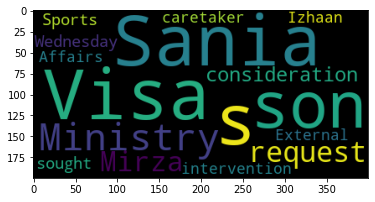

In [64]:
text=d_articles[1326]
cloud(text)

In [65]:
d_articles[1474][:2000]

c:\users\ravi\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


"Thomas Tuchel laments Chelsea’s bad luck after FA Cup final lossThe former Borussia Dortmund and Paris St Germain coach felt his side had done well to limit Leicester's effectiveness on the break."

c:\users\ravi\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


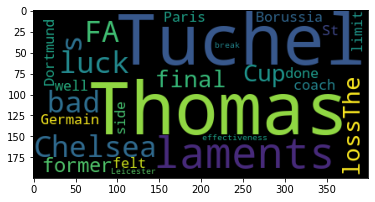

In [66]:
text=d_articles[1474]
cloud(text)

In [67]:
d_articles[898][:2000]

c:\users\ravi\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'Sanath Jayasuriya to coach Melbourne club in his return from ICC banSanath Jayasuriya was banned in February 2019 for breaching the ICC anti-corruption code.\r\n'

c:\users\ravi\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


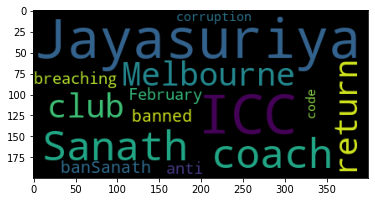

In [68]:
text=d_articles[898]
cloud(text)

In [26]:
def plot_lda_vis(lda_model, bow_corpus, dic):
    pyLDAvis.enable_notebook()
    vis = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dic)
    return vis

c:\users\ravi\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


c:\users\ravi\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ravi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [41]:
#lda_model.show_topics()

c:\users\ravi\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Topic 0 indicates about vaccination of centre and state.

In [29]:
## visualizes the results of LDA interactively.
plot_lda_vis(lda_model, bow_corpus, dic)

c:\users\ravi\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.068730 -0.028691       1        1  20.162504
3      0.050103  0.065556       2        1  19.527995
4     -0.011061  0.061767       3        1  19.180040
5      0.056209 -0.047356       4        1  17.403109
2     -0.097854  0.042811       5        1  13.346572
1     -0.066128 -0.094086       6        1  10.379782, topic_info=         Term       Freq       Total Category  logprob  loglift
6927  Zealand  48.000000   48.000000  Default  30.0000  30.0000
6458  England  84.000000   84.000000  Default  29.0000  29.0000
6610     Open  63.000000   63.000000  Default  28.0000  28.0000
6572     Test  58.000000   58.000000  Default  27.0000  27.0000
159       New  75.000000   75.000000  Default  26.0000  26.0000
...       ...        ...         ...      ...      ...      ...
174   vaccine   9.991018  152.097641   Topic6  -6.3354  -0.4575
6520   player   8.756109   84.046901   Topic6  -6.4673   0.0037
265       The   9.243745  138.283980   Topic6  -6.4131  -0.4401
245      need   8.485795   73.606361   Topic6  -6.4986   0.1050
78       year   8.941620  157.499833   Topic6  -6.4463  -0.6034

[501 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
7495      2  0.823018  10,000
451       1  0.250254   18-44
451       4  0.750761   18-44
3639      2  0.720521     1st
3639      3  0.051466     1st
...     ...       ...     ...
78        2  0.152381    year
78        3  0.387302    year
78        4  0.120635    year
78        5  0.101587    year
78        6  0.057143    year

[1112 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 5, 6, 3, 2])

#### On the left side, the area of each circle represents the importance of the topic relative to the corpus. As there are four topics, we have four circles
#### The distance between the center of the circles indicates the similarity between the topics. Here you can see that the topic 1 2 3 and topic 5 overlap, this indicates that the topics are more similar.
#### On the right side, the histogram of each topic shows the top 30 relevant words. For example, in topic 6 the most relevant words are french, win, match,etc
#### So in our case, we can see a lot of words and topics associated with covid and vaccine in the news headlines.

## Wordcloud of words

In [30]:
def plot_wordcloud(text):
    nltk.download('stopwords')
    stop=set(stopwords.words('english'))

    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    wordcloud = WordCloud(
        background_color='white',
        stopwords=set(STOPWORDS),
        max_words=100,
        max_font_size=30, 
        scale=3,
        random_state=1)
    
    wordcloud=wordcloud.generate(str(corpus))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
 
    plt.imshow(wordcloud)
    plt.show()

c:\users\ravi\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


c:\users\ravi\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ravi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


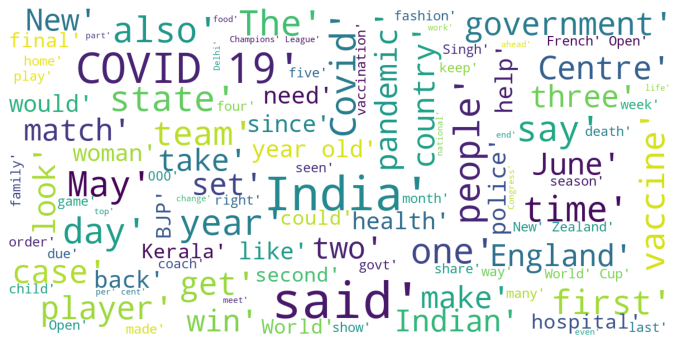

In [31]:
plot_wordcloud(data['title_description'])

#### the word related to pandemic like covid 19, people and releated to match are highlated.

c:\users\ravi\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
